## Using Conditional Node
### Code should check if sign is + or - to decide either to add or substract 2 integers

In [10]:
from typing import TypedDict 
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    num1: int
    num2: int
    operator: str
    store: int

SUB = "Substract"
ADD = "ADD"
ROUTER = "router"

In [11]:
#declare the node functions
def add_node(state:AgentState)->AgentState:
    """ Add Two Numbers Together"""

    state['store']=state['num1'] + state['num2']
    return state

def substract_node(state:AgentState)->AgentState:
    """ Substract Two Numbers from each other"""

    state['store']=state['num1'] - state['num2']
    return state

def operator_node(state:AgentState)->AgentState:
    """ Add Two Numbers Together"""

    if state['operator']=="+":
        return "Adding"
    elif state['operator']=="-":
        return "Substracting"



In [13]:
graph = StateGraph(AgentState)

graph.add_node(ADD,add_node)
graph.add_node(SUB,substract_node)
graph.add_node(ROUTER,lambda state:state)

graph.add_edge(START,ROUTER)
graph.add_conditional_edges(
    ROUTER,
    operator_node,
    {
        "Adding":ADD,
        "Substracting":SUB
    }
    
)
graph.add_edge(ADD,END)
graph.add_edge(SUB,END)

app = graph.compile()

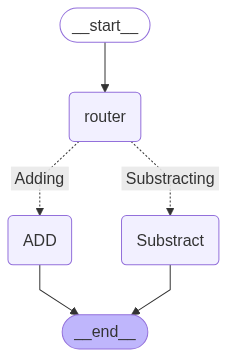

In [14]:
app

In [18]:
maths= AgentState(num1=30, num2=20, operator="+")
result = app.invoke(maths)
result.get('store')


50

In [21]:
import random
nums = [4,5,10]
print(nums)
nums.append(random.randint(0,10))
print(nums)

[4, 5, 10]
[4, 5, 10, 5]
